## **EXPLORATORY DATA ANALYSIS**
### **Análisis de los factores clave que impulsan la empleabilidad de los estudiantes universitarios**

### ***ÍNDICE***
1. Importación de librerías
2. Carga de datos
3. Reducción de datos
4. Tipos de datos y valores nulos
5. Data Wrangling
6. Exploratory Data Analysis


>  **1.** **IMPORTACIÓN DE LIBRERÍAS**

In [1]:
# Importar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>  **2.** **CARGA DE DATOS**

In [2]:
# Carga de datos DataFrame principal

df = pd.read_csv("data/EILU_2019.csv",sep="\t")

C:\Users\beatr\AppData\Local\Temp\ipykernel_21060\4148141566.py:3: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/EILU_2019.csv",sep="\t")


In [3]:
# Obtenemos un vistazo del df, sus columnas y el formato de sus filas
df

,IDENT,SEXO,EDAD,NACIO,NACIO1,NACIO2,PAIS_NACI,TITU,RAMA,AMBITO,...,ANHCUR4,DENCUR5,DURCUR5,RESCUR5,ANHCUR5,DENCUR6,DURCUR6,RESCUR6,ANHCUR6,FACTOR
0,1,1,1,1,,,1,11101,3,11,...,,,,,,,,,,9.894742
1,2,1,1,1,,,1,11101,3,11,...,,,,,,,,,,9.894742
2,3,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.965467
3,4,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.859689
4,5,1,1,1,,,1,11101,3,11,...,,,,,,,,,,10.859689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31646,31647,2,2,1,,,1,109999,3,109,...,,,,,,,,,,1.780764
31647,31648,2,2,1,,,1,109999,3,109,...,,,,,,,,,,1.780764
31648,31649,1,3,1,,,1,109999,3,109,...,,,,,,,,,,3.038041
31649,31650,1,1,1,,,1,109999,3,109,...,,,,,,,,,,3.038041


In [4]:
df.shape

(31651, 299)

Observamos que tiene **31651 filas**. Es un nivel alto de datos y no todos los registros nos interesarán para el estudio. Más adelante filtraremos aquellas filas que no nos interesan. En cuanto a las columnas, un valor de **299 columnas** es grande y tenemos que tener en cuenta aquellas que sí nos serán de utilidad para comprobar nuestra hipótesis y formular las conclusiones, es decir, aquellas que realmente tienen valor para nuestro análisis exploratorio

>  **3.** **REDUCCIÓN DE DATOS**

Para saber qué columnas aportan valor a nuestro estudio recurrimos a un segundo archivo: "data/dr_EILU_2019.xlsx" Nuestro conjunto de datos completo se compone de dos archivos: un csv con los registros codificados de 31561 individuos y el archivo excel (del que más adelante hablaremos) con la codificación y diseño de los datos. Este archivo nos puede servir de guía para comprender los campos y valores del DataFrame principal.

In [5]:
# Cargamos el diseño del conjunto de datos que contiene la información de las columnas codificadas

cod = pd.read_excel("data/dr_EILU_2019.xlsx",header=1,usecols = 'A:I') # O eliminar las col unnamed
cod

,Variable,Diccionario de la variable,Longitud,Tipo,Decimales,Posición,Orden,Diccionario ubicado en la hoja…,Descripción
0,IDENT,NaN,5,N,NaN,1.0,1.0,NaN,Nº de identificación de la persona
1,SEXO,TSEXO,1,A,NaN,6.0,2.0,Tablas1,Sexo
2,EDAD,TEDAD,1,A,NaN,7.0,3.0,Tablas1,Grupo de edad (a 31-dic-2019)
3,NACIO,TNACIO,1,A,NaN,8.0,4.0,Tablas1,Nacionalidad
4,NACIO1,TNACIOP,1,A,NaN,9.0,5.0,Tablas1,País de nacionalidad 1
...,...,...,...,...,...,...,...,...,...
295,DURCUR6,TDrCurs,1,A,NaN,371.0,296.0,Tablas2,Duración del sexto curso de formación del SEPE...
296,RESCUR6,TReCurs,1,A,NaN,372.0,297.0,Tablas2,Resultado del sexto curso de formación del SEP...
297,ANHCUR6,TAnCurs,4,A,NaN,373.0,298.0,Tablas2,Año de finalización del sexto curso de formaci...
298,FACTOR,NaN,11,N,6.0,377.0,299.0,NaN,Factor de elevación (seis decimales )


Este archivo, se trata de un formato excel con varías páginas. En la primera hoja, contiene un listado con toda las variables y su descripción. Además, contiene una variable que te indica en qué página del excel se encuentra la codificación de cada variable.

Tras estudiar los diferentes campos, nos quedamos con las siguientes columnas:

In [6]:
# Limpieza de datos: mediante selección de coolumnas (podría haberse hecho a la inversa con un drop)
students = df.copy()

students= students[['IDENT','SEXO','EDAD','NACIO','TITU','RAMA','AMBITO','T_UNIV','DISCA','ESTUDIOS_PADRE','ESTUDIOS_MADRE',
                  'SAT1','SAT2','EST_B11_1','EST_B11_2','EST_B11_3','EST_B11_4','EST_B11_5','EST_B11_6','EST_B12',
                  'EST_B16','EST_B24','EST_B28','IDIOMAS', 'IDI_MT1', 'IDI_MT2','TIC','IDIOMA1','NIV_ID1','TIPOACREIDI1',
                  'IDIOMA2','NIV_ID2','TIPOACREIDI2','TRBPRN1','TRBPRN2','TRINAC_D4',
                  'TRINAC_D5','TRINAC_D6','TRPARA_D5','TRPARA_D6','TRAC_D9','LUG_TRAB_PAIS','SIT_PRO','JORNADA','TR_TAM',
                  'TR_SUELDO','TR_D19','TR_D21', 'HL_E1','HL_E2','HL_E3','HL_E5','HATR_E11','HATR_E12','P_CONTI','PR_SIT_PR',
                  'PR_JOR','PR_NIVEL','PR_AREA','PR_CONOC','PR_SUELDO','HATR_E27', 'NOTRAB_BUS', 'NOTRAB_BUSM', 'NOTRAB_BUST','EST_B8']]

In [7]:
students

,IDENT,SEXO,EDAD,NACIO,TITU,RAMA,AMBITO,T_UNIV,DISCA,ESTUDIOS_PADRE,...,PR_JOR,PR_NIVEL,PR_AREA,PR_CONOC,PR_SUELDO,HATR_E27,NOTRAB_BUS,NOTRAB_BUSM,NOTRAB_BUST,EST_B8
0,1,1,1,1,11101,3,11,2,2,2,...,1,3,2,1,3,1,,,,1
1,2,1,1,1,11101,3,11,2,2,3,...,1,3,2,1,3,1,,,,1
2,3,1,1,1,11101,3,11,1,2,3,...,2,4,3,2,3,1,,,,1
3,4,1,1,1,11101,3,11,1,2,7,...,2,4,3,2,2,1,,,,1
4,5,1,1,1,11101,3,11,1,2,8,...,2,3,2,1,3,2,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31646,31647,2,2,1,109999,3,109,1,2,9,...,2,2,3,1,3,1,,,,1
31647,31648,2,2,1,109999,3,109,1,2,6,...,2,3,1,2,3,2,,,,1
31648,31649,1,3,1,109999,3,109,1,2,3,...,2,3,1,1,3,1,,,,1
31649,31650,1,1,1,109999,3,109,1,2,8,...,1,3,1,9,9,1,,,,1


La información de las columnas seleccionadas es la siguiente:

In [8]:
# Fijamos la columna 'Variable' como índice de este DataFrame, con el fin de poder buscar más fácilmente por nombres de variables.
cod.set_index('Variable',inplace=True)

In [9]:
cod.index

Index(['IDENT', 'SEXO', 'EDAD', 'NACIO', 'NACIO1', 'NACIO2', 'PAIS_NACI',
       'TITU', 'RAMA', 'AMBITO',
       ...
       'DENCUR5', 'DURCUR5', 'RESCUR5', 'ANHCUR5', 'DENCUR6', 'DURCUR6',
       'RESCUR6', 'ANHCUR6', 'FACTOR', 'TOTAL'],
      dtype='object', name='Variable', length=300)

In [10]:
columns_list = students.columns.to_list() # Lista con el nombre de las columnas de nuestro DataFrame

# Por cada columna del DataFrame students nos imprime la descripción de la misma.

descripciones = [] # Lista de listas donde cada valor será el par [varialbe,descripción]

for variable in cod.index:
    if variable in columns_list:
        descripciones.append([variable, cod.loc[variable]['Descripción']])

In [11]:
for variable, descripcion in descripciones:
    print(f"{variable} : {descripcion}")

IDENT : Nº de identificación de la persona
SEXO : Sexo
EDAD : Grupo de edad (a 31-dic-2019)
NACIO : Nacionalidad
TITU : Titulación
RAMA : Rama de conocimiento de la titulación
AMBITO : Ámbito de estudio
T_UNIV : Tipo de Universidad
DISCA : Tiene discapacidad reconocida superior al 33%
ESTUDIOS_PADRE : Nivel de formación máximo alcanzado por el padre
ESTUDIOS_MADRE : Nivel de formación máximo alcanzado por la madre
EST_B8 : Motivo principal por el que ha realizado sus estudios
SAT1 : Si tuviese que empezar volvería a cursar estudios universitarios
SAT2 : Si tuviese que empezar volvería a estudiar la misma titulación
EST_B11_1 : Otros estudios: Grado / Diplomatura / Licenciatura o equivalente
EST_B11_2 : Otros estudios: Máster universitario
EST_B11_3 : Otros estudios: Doctorado universitario
EST_B11_4 : Otros estudios: Estudios artísticos superiores (artes plásticas, diseño, música y danza, arte dramático o conservación y restauración de bienes culturales)
EST_B11_5 : Otros estudios: Cic

Con el fin de tener esta información a nuestra disposición durante el desarrollo del análisis, crearemos un archivo .txt con la salida anterior para poder recurrir a el cuando sea necesario.

In [12]:
# Escribir la lista de variables y descripciones en el archivo TXT
with open("data/descripciones_columnas", 'w', encoding='utf-8') as archivo_descripciones:
    # Escribir cada línea de variables y descripciones
    for variable, descripcion in descripciones:                 # Recorremos la lista creada anteriormente
        archivo_descripciones.write(f'{variable} : {descripcion}\n')

De esta forma hemos reducido el número de columnas de 299 a 69

>  **4.** **TIPOS DE DATOS Y VALORES NULOS**

In [13]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31651 entries, 0 to 31650
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDENT           31651 non-null  int64 
 1   SEXO            31651 non-null  int64 
 2   EDAD            31651 non-null  int64 
 3   NACIO           31651 non-null  int64 
 4   TITU            31651 non-null  int64 
 5   RAMA            31651 non-null  int64 
 6   AMBITO          31651 non-null  int64 
 7   T_UNIV          31651 non-null  int64 
 8   DISCA           31651 non-null  int64 
 9   ESTUDIOS_PADRE  31651 non-null  int64 
 10  ESTUDIOS_MADRE  31651 non-null  int64 
 11  SAT1            31651 non-null  int64 
 12  SAT2            31651 non-null  object
 13  EST_B11_1       31651 non-null  int64 
 14  EST_B11_2       31651 non-null  int64 
 15  EST_B11_3       31651 non-null  int64 
 16  EST_B11_4       31651 non-null  int64 
 17  EST_B11_5       31651 non-null  int64 
 18  EST_B1

Como podemos observar, ninguna columna tiene datos nulos de los 31651. Sin embargo, a simple vista podemos observar campos vacíos. Esto se puede deber a que los valores nulos están contemplados como string con espacios en blanco

In [14]:
students.iloc[0]['NOTRAB_BUS'] # Los registros sin datos, son espacios en blanco


' '

In [15]:
# Podríamos reemplazar estos valores por datos NaN. Sin embargo, más adelante lo realizaremos a la vez que modificamos el tipo de los datos, de un solo paso.
# students.replace(' ', pd.NA, inplace=True)

Otra observación a tener en cuenta es el tipo de datos. A primera vista, todos parecen ser numéricos; sin embargo, se observa que varias columnas están etiquetadas como 'object'. Esto podría atribuirse a lo mencionado anteriormente, donde los valores sin datos se representan como espacios en blanco. Optamos por una transformación que asegure que todos los valores sean tratados como numéricos. Tenemos certeza sobre el diseño de la base de datos y estamos seguros de que todos los datos son numéricos, sin riesgo de pérdida de información.

In [16]:
students.dtypes

IDENT           int64
SEXO            int64
EDAD            int64
NACIO           int64
TITU            int64
                ...  
HATR_E27       object
NOTRAB_BUS     object
NOTRAB_BUSM    object
NOTRAB_BUST    object
EST_B8          int64
Length: 66, dtype: object

In [17]:
students = students.apply(pd.to_numeric, errors='coerce', downcast='integer') 

# Al forzar el cambio a tipo numérico con errors='coerce', aquellos valores no numéricos (como los espacios en blanco), serán considerados NaN
# De esta forma realizamos dos pasos en 1: cambiar todos los valores a tipo numérico y modificar los string vacíos a nulos.

In [18]:
students.dtypes

IDENT            int16
SEXO              int8
EDAD              int8
NACIO             int8
TITU             int32
                ...   
HATR_E27       float64
NOTRAB_BUS     float64
NOTRAB_BUSM    float64
NOTRAB_BUST    float64
EST_B8            int8
Length: 66, dtype: object

In [19]:
df_students = students.copy()

> **5** **Data Cleaning/Wrangling**

Algunas variables del dataset necesitan modificaciones para que sea más sencillo trabajar con los datos y para obtener las respuestas que buscamos.

     TRBPRN1

Variable que indica la situación laboral actual:

**1** - Activo

**2** - En desempleo

**3** - Inactivo

In [20]:
# Diccionario con la nueva codificación para la columna 'TRBPRN1'
empleo = {1: "Trabajando", 2: "Desempleo", 3:"Inactivo"}

students['TRBPRN1'] = students['TRBPRN1'].replace(empleo)

Para el análisis de la situación laboral de los estudiantes a fecha de la obtención de los datos (2019), no nos interesa la población inactiva, ya que no está buscando trabajo activamente. Sin embargo, crearemos un dataframe aparte con esta condición ya que si nos puede interesar otra información relevante como por ejemplo, si nada más terminar sus estudios (en 2014) consiguieron trabajo (aunque actualmente estén inactivos).

In [21]:
students_empleo = students.copy()
students_empleo = students_empleo[students_empleo['TRBPRN1']!='Inactivo'] # Excluímos aquellos que están inactivos (no buscan empleo)

     T_UNIV

Esta variable indica el tipo de universidad:

**1** -	*Universidad Pública presencial*

**2** -	*Universidad Pública a distancia*

**3** -	*Universidad Privada presencial*

**4** -	*Universidad Privada a distancia*

Sin embargo para nuestro análisis contemplamos dos valores: estudiar en una universidad pública o privada. Realizaremos la conversión a la siguiente codificación:

**1** -	*Universidad Pública (presencial o a distancia)*

**2** -	*Universidad Privada (presencial o a distancia)*

In [22]:
# Diccionario con la nueva codificación para la columna 'T_UNIV'
tipo_uni = {1: 'Publica', 2: 'Publica', 3: 'Privada', 4: 'Privada'}

# Reemplaza los valores en la columna 'T_UNIV'
students['T_UNIV'] = students['T_UNIV'].replace(tipo_uni)
students_empleo['T_UNIV'] = students_empleo['T_UNIV'].replace(tipo_uni)

    > RAMA

Nueva codificación de la variable 'RAMA'

In [23]:
# Diccionario con la nueva codificación para la columna 'RAMA'
ramas = {1: "Artes/Humanidades", 2: "Ciencias", 3:"Ciencias sociales", 4:"Ingeniería/arquitectura", 5:"Salud"}

students['RAMA'] = students['RAMA'].replace(ramas)
students_empleo['RAMA'] = students_empleo['RAMA'].replace(ramas)

> **7** **Exploratory Data Anaysis**

Para comenzar el análisis de las variables, es necesario comprender exactamente qué estamos buscando, con el fin de poder seleccionar aquellos datos que nos aporten mayor información para nuestra hipótesis. 

El objetivo principal es saber si factores como el tipo de universidad o la rama de conocimiento te garantizan más oportunidades laborales al terminar el grado universitario. 

Los **factores clave** a tener en cuenta en este análisis exploratorio para obtener conclusiones son:

- Rama de conocimiento

- Tipo de universidad

- Edad

- Motivación por los estudios



Las **hipótesis principales** planteadas se corresponde con cada factor anterior y son las siguientes:

1. Los estudiantes de ciertas ramas tiene más oportunidades de encontrar trabajo .

2. Estudiar en una universidad privada te garantiza más oportunidades de empleo al terminar el grado universitario.

3. La edad de obtención del título universitario influye en la empleabilidad.

4.  La vocación hacia los estudios afecta la empleabilidad de los estudiantes.




##### **7.1 Análisis univariante**

Todas las variables de nuestro conjunto de datos son variables categóricas, es decir, van a ser estudiadas de forma discreta ya que no existe ninguna variable contínua para. Dividiremos el análisis univariante en los siguientes apartados:
- Variables relacionadas con la descripción de la población
- Variables relacionadas con la formación de la población
- Variables relacionadas con la situación laboral

##### **Descripción de la población**

Describiremos a grandes rasgos las principales variables que nos permiten obtener una descripción de la población

    > SEXO

In [24]:
# Diccionario con la nueva codificación para la columna 'SEXO'
sexo = {1: "Hombre", 2: "Mujer"}

students['SEXO'] = students['SEXO'].replace(sexo)
students_empleo['SEXO'] = students_empleo['SEXO'].replace(sexo) # Añadimos esta codificación al dataset students_empleo

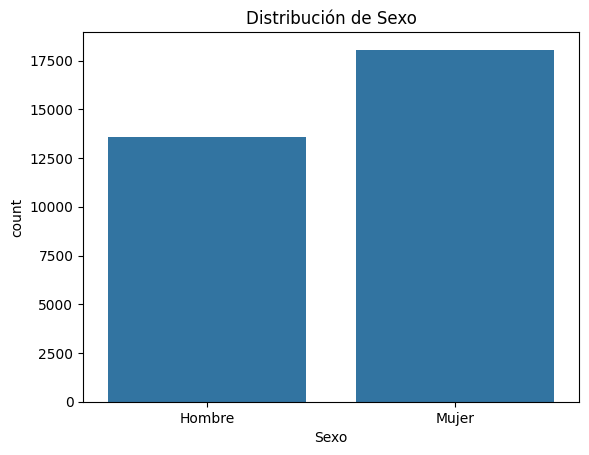

In [25]:
# Representación gráfica de la variable 'SEXO'
sns.countplot(x='SEXO', data=students)

# Labels
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')

plt.show()

In [26]:
students['SEXO'].value_counts()

Mujer     18056
Hombre    13595
Name: SEXO, dtype: int64

El **57%** de los graduados universitarios en el curso 2013-2014 era **mujeres**, mientras que el **43% eran hombres**.

    > EDAD

In [27]:
# Diccionario con la nueva codificación para la columna 'EDAD'
edades = {1: "Menores de 30 años", 2: "30-34 años", 3:"Mayores de 35 años"}

students['EDAD'] = students['EDAD'].replace(edades)
students_empleo['EDAD'] = students_empleo['EDAD'].replace(edades)

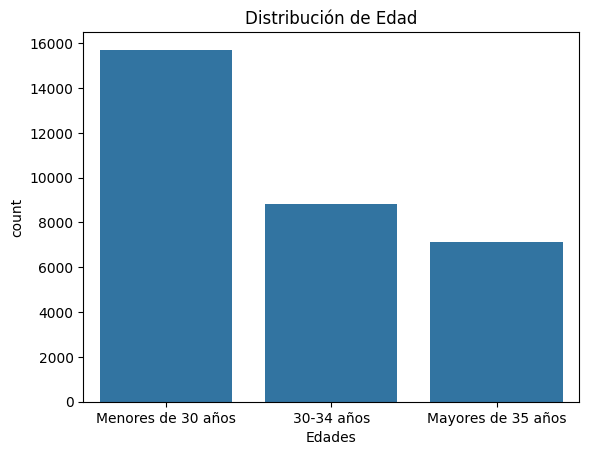

In [28]:
# Representación gráfica de la variable 'EDAD'
sns.countplot(x='EDAD', data=students)

# Labels
plt.title('Distribución de Edad')
plt.xlabel('Edades')

plt.show()

In [29]:
students['EDAD'].value_counts()

Menores de 30 años    15707
30-34 años             8825
Mayores de 35 años     7119
Name: EDAD, dtype: int64

El **50%** de los graduados universitarios en el curso 2013-2014 tenían **menos de 30 años**, mientras que el **28% tenía una edad comprendida entre 30 y 34 años** y el **22% eran de 35 años o más**.

    > NACIO

La variable 'NACIO' representa la nacionalidad de los estudiantes universitarios.

In [30]:
# Diccionario con la nueva codificación para la columna 'NACIO'
nacionalidades = {1: "Española", 2: "Española y otra", 3:"Otra"}

students['NACIO'] = students['NACIO'].replace(nacionalidades)

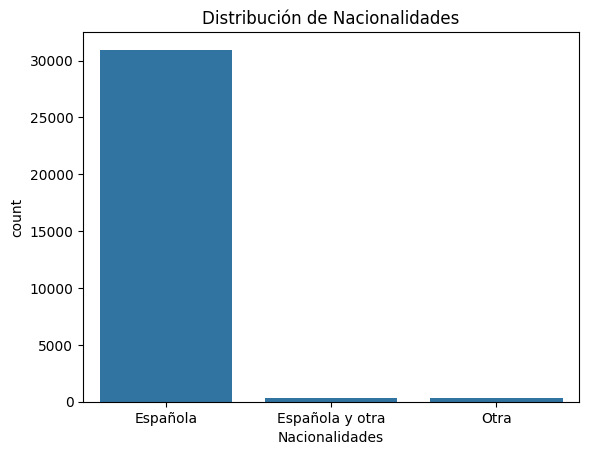

In [31]:
# Representación gráfica de la variable de nacionalidad
sns.countplot(x='NACIO', data=students)

# Labels
plt.title('Distribución de Nacionalidades')
plt.xlabel('Nacionalidades')

plt.show()

In [32]:
students['NACIO'].value_counts(normalize=True)

Española           0.978137
Otra               0.011027
Española y otra    0.010837
Name: NACIO, dtype: float64

El **97.8%** de los graduados universitarios en el curso 2013-2014 tenían **nacionalidad española**.

##### **Análisis de la formación de la población**

Realizamos un análisis rápido de algunas variables interesantes de nuestro dataset:

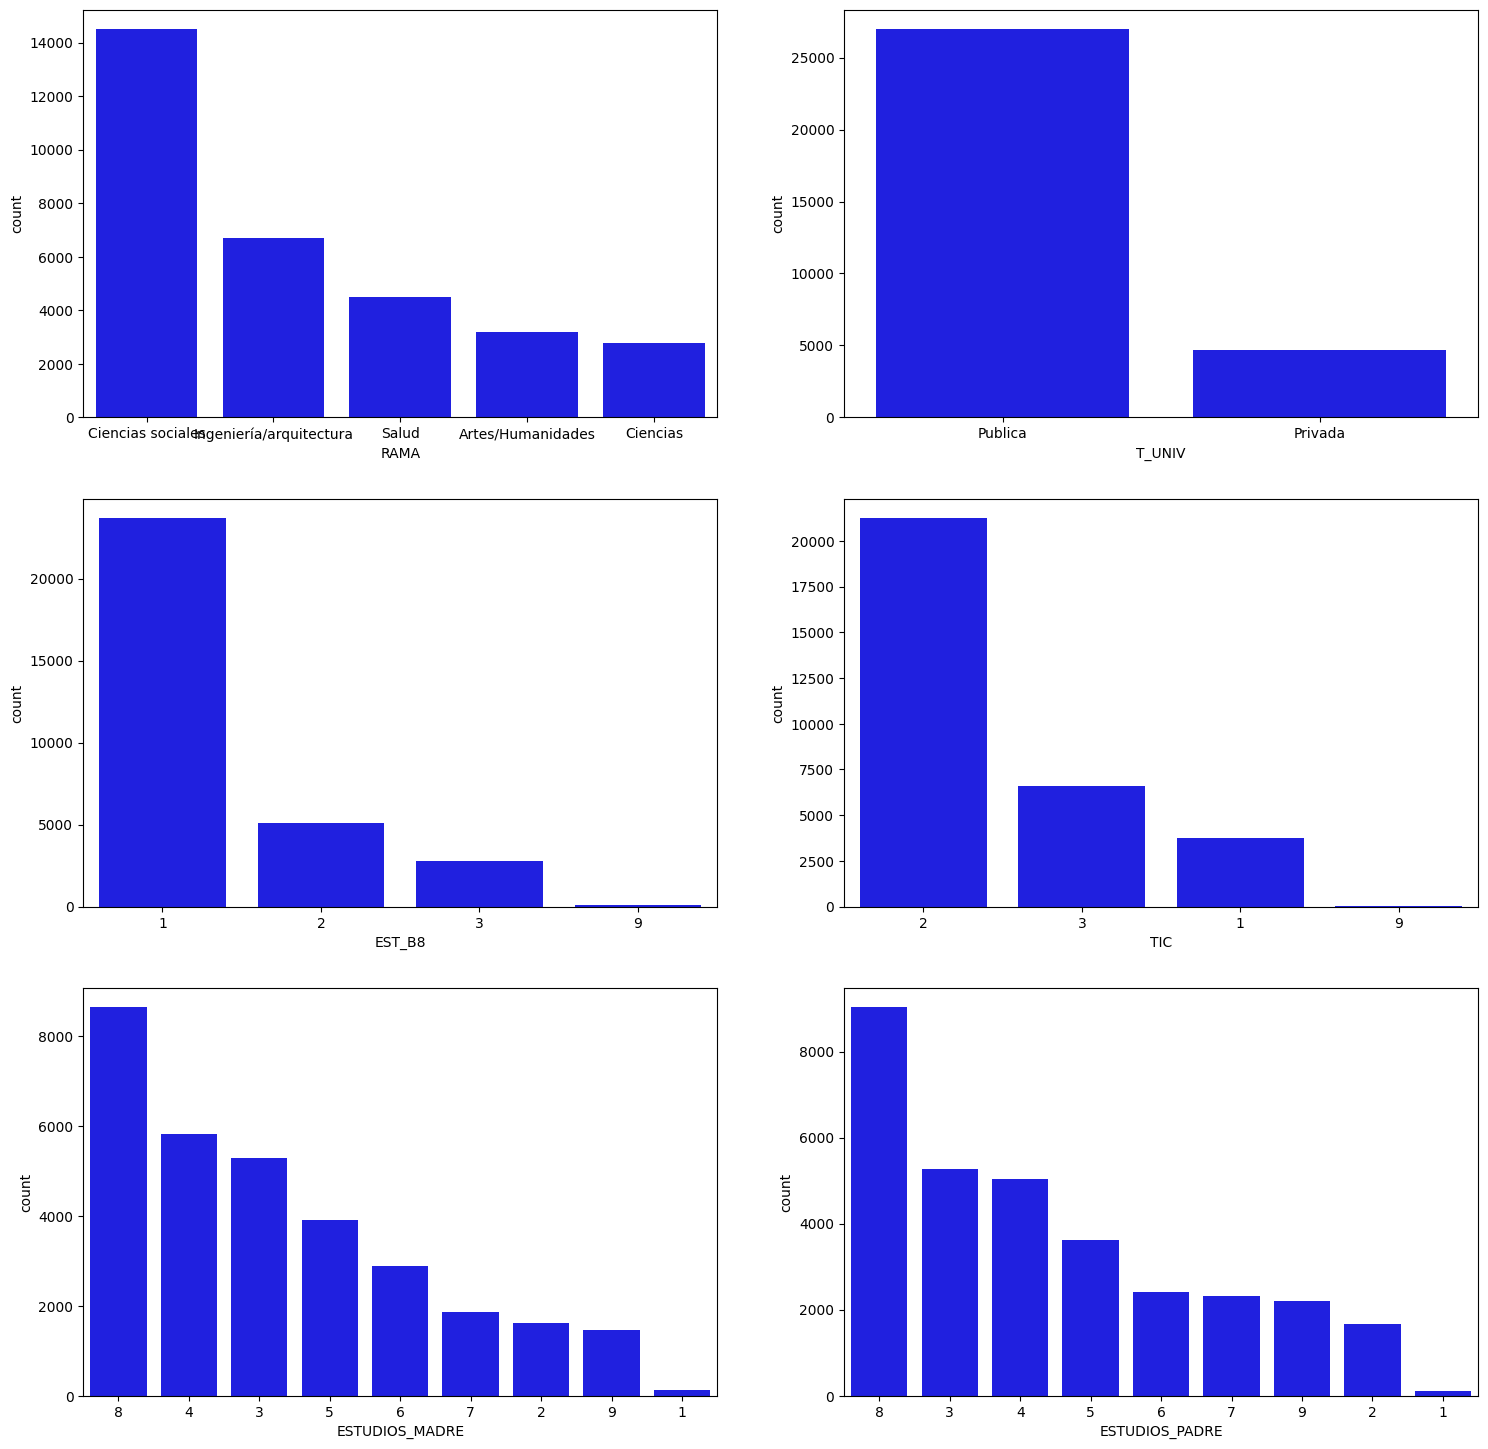

In [33]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
sns.countplot(ax = axes[0, 0], x = 'RAMA', data = students, color = 'blue',  # RAMA 
              order = students['RAMA'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'T_UNIV', data = students, color = 'blue',  # TIPO DE UNIVERSIDAD
              order = students['T_UNIV'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'EST_B8', data = students, color = 'blue',  # MOTIVACIÓN POR LOS ESTUDIOS
              order = students['EST_B8'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'TIC', data = students, color = 'blue',  # FORMACIÓN EN TIC 
              order = students['TIC'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'ESTUDIOS_MADRE', data = students, color = 'blue',  # ESTUDIOS MADRE
              order = students['ESTUDIOS_MADRE'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'ESTUDIOS_PADRE', data = students, color = 'blue',  # ESTUDIOS PADRE
              order = students['ESTUDIOS_PADRE'].value_counts().index);

In [34]:
students['RAMA'].value_counts(normalize=True)

Ciencias sociales          0.458248
Ingeniería/arquitectura    0.211842
Salud                      0.141796
Artes/Humanidades          0.100376
Ciencias                   0.087738
Name: RAMA, dtype: float64

In [35]:
students['T_UNIV'].value_counts(normalize=True)

Publica    0.852359
Privada    0.147641
Name: T_UNIV, dtype: float64

In [36]:
students['EST_B8'].value_counts(normalize=True)

1    0.747938
2    0.160816
3    0.087612
9    0.003633
Name: EST_B8, dtype: float64

In [37]:
students['TIC'].value_counts(normalize=True)

2    0.671069
3    0.208398
1    0.118985
9    0.001548
Name: TIC, dtype: float64

In [38]:
students['ESTUDIOS_MADRE'].value_counts(normalize=True)

8    0.272977
4    0.183849
3    0.167420
5    0.123440
6    0.091498
7    0.059177
2    0.051341
9    0.046349
1    0.003949
Name: ESTUDIOS_MADRE, dtype: float64

In [39]:
students['ESTUDIOS_PADRE'].value_counts(normalize=True, )

8    0.285109
3    0.166219
4    0.159458
5    0.114025
6    0.076111
7    0.073078
9    0.069508
2    0.052921
1    0.003570
Name: ESTUDIOS_PADRE, dtype: float64

Del análisis univariante sobre la formación obtenemos las siguientes conclusiones:

- La distribución de estudiantes por rama han sido las siguientes:

    - Ciencias sociales          45,8%
    - Ingeniería/arquitectura    21,2%
    - Salud                      12,2%
    - Artes/Humanidades          10%
    - Ciencias                   8,8%

- El 89% tiene formación intermedia o avanzada en el uso de dispositivos informáticos.
- El 85% de los graduados han cursado sus estudios en una Universidad Pública.
- Casi el 75% de los que han estudiado un grado universitario lo han hecho pensando en su futuro laboral, mientras que el 16% lo ha hecho por satisfacción personal.
- La formación parental se basa en su mayoría en estudios universitarios destacandose sobre el resto de tipos de formaciones


##### **Análisis de la situación laboral**

    >TRBPRN1

In [40]:
round(students['TRBPRN1'].value_counts(normalize=True)*100,2) # Situación laboral tras 5 años de la obtención del título

Trabajando    85.7
Desempleo      7.7
Inactivo       6.6
Name: TRBPRN1, dtype: float64

De los graduados en el curso 2013/2014, tras 5 años (2019), aproximadamente el 85,7% se encuentra en activo. Mientras que el 7,7% está en desempleo y un 6,6% se encuentra inactivo.

    >TRBPRN2

In [41]:
students['TRBPRN2'].value_counts(normalize=True) # Situación de inactividad (1: Continúa estudiando)

1.0    0.662039
5.0    0.123025
4.0    0.102441
2.0    0.051221
3.0    0.033988
9.0    0.027286
Name: TRBPRN2, dtype: float64

De los estudiantes inactivos 5 años tras la obtención de su título, el 66% se debe a su continuación de los estudios.

##### **7.2 Análisis multivariante**


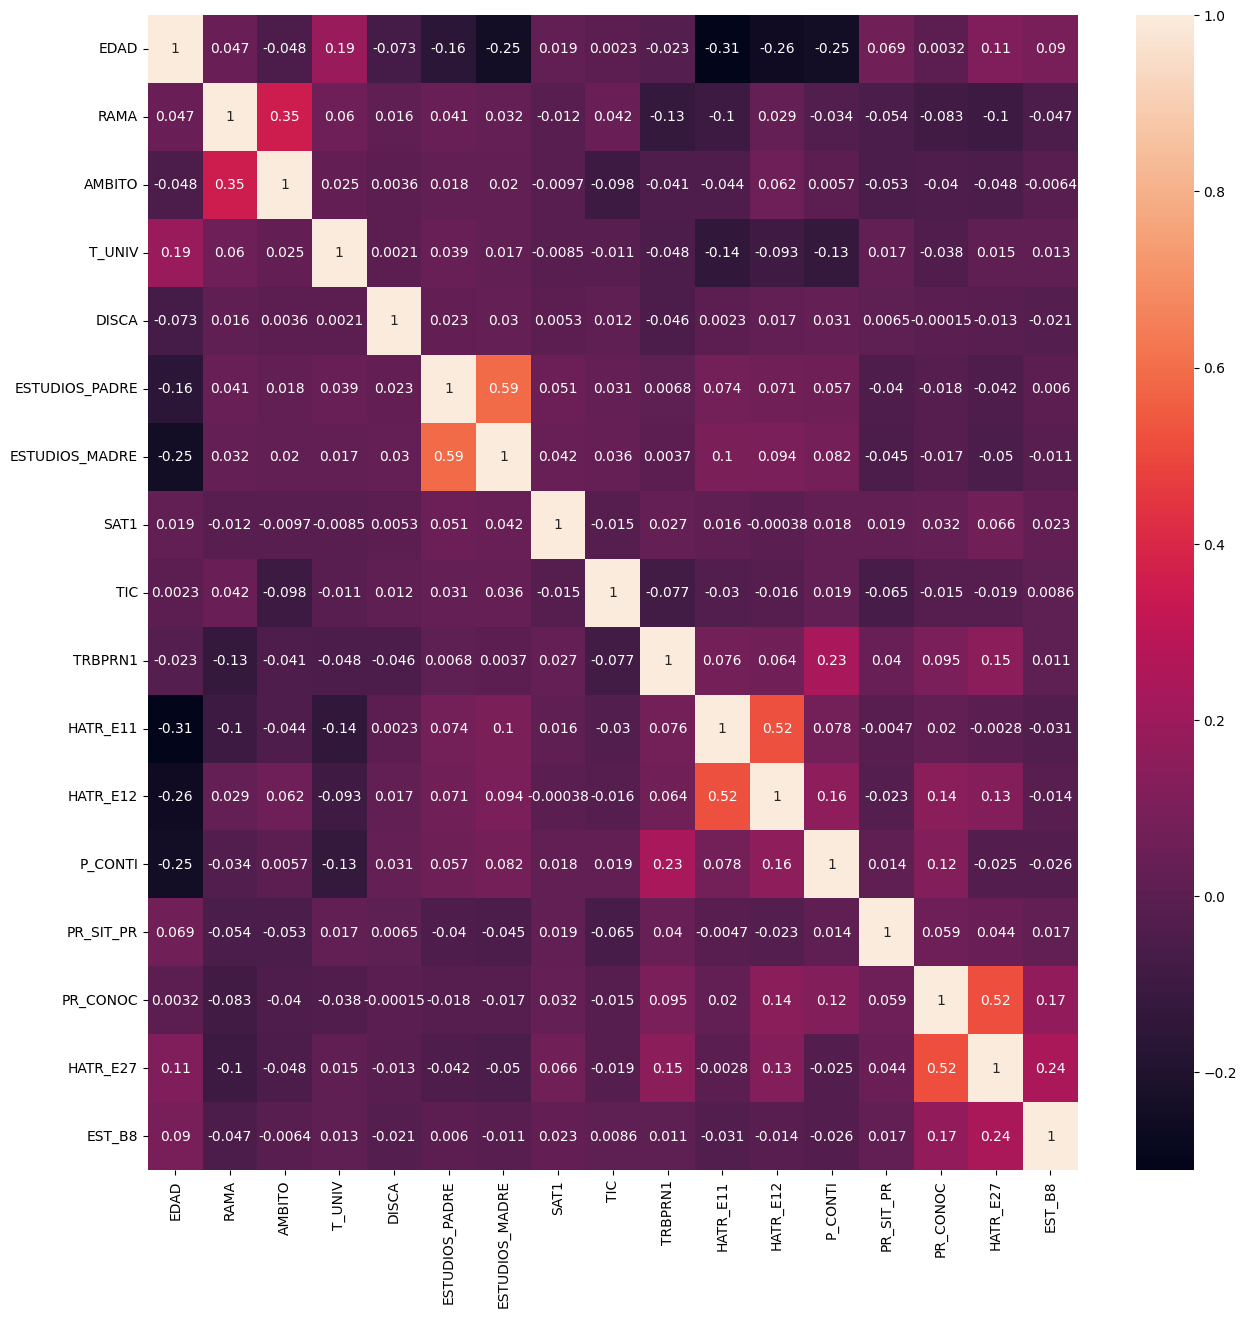

In [42]:
# Seleccionamos aquellas columnas que podrían estar relacionadas con la edad de los estudiantes como por ejemplo:
#   Situación laboral
#   Rama de estudio
#   Tipo de universidad
#   Uso de las tecnologías
#   Situación laboral de su primer empleo tras la titulación


students_hm = df_students.copy()
students_hm = students_hm[['EDAD','RAMA','AMBITO','T_UNIV','DISCA','ESTUDIOS_PADRE','ESTUDIOS_MADRE',
                  'SAT1','TIC','TRBPRN1','HATR_E11','HATR_E12','P_CONTI','PR_SIT_PR','PR_CONOC','HATR_E27', 'EST_B8']]
plt.figure(figsize=(15,15))

sns.heatmap(students_hm.corr(),annot=True); # Realizamos un mapa de calor con la correlación de 'EDAD' y varias variables seleccionadas

#### **7.3 Análisis de hipótesis**

    1. Estudiar en una universidad privada te garantiza más oportunidades de empleo al terminar el grado universitario

El estudio de esta hipótesis sobre nuestros datos nos va a permitir dar respuesta a la siguiente pregunta:  

¿**DÓNDE** estudiar inlfuye en la empleabilidad?

##### **Situación laboral a los 5 años por tipo de universidad**

Para una primera observación, filtraremos a aquellos individuos que han estudiado únicamente un grado universitario, con el fin de obtener una respuesta más acertada a nuestra hipótesis inicial, ya que tener más de un título impediría diferenciar cuál de ellos ha sido determinante para obtener el empleo. Emplearemos el dataset 'students_empleo' ya que no queremos considerar la población inactiva.

Las columnas que nos aportan esta información son las siguientes*:



*Primer grupo*
- **EST_B11_1** : Otros estudios: Grado / Diplomatura / Licenciatura o equivalente
- **EST_B11_2** : Otros estudios: Máster universitario
- **EST_B11_3** : Otros estudios: Doctorado universitario
- **EST_B11_4** : Otros estudios: Estudios artísticos superiores (artes plásticas, diseño, música y danza, drama o conservación y restauración)
- **EST_B11_5**: Otros estudios: Ciclos Formativos de grado superior (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Superior
- **EST_B11_6**: Otros estudios: Ciclos Formativos de grado medio (fp, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Medio

*Segundo grupo*
- **EST_B12** : Nº de otros estudios: Grado / Diplomatura / Licenciatura o equivalente
- **EST_B16** : Nº de otros estudios: Máster universitario
- **EST_B24** : Nº de otros estudios: Ciclos Formativos de grado superior (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Superior
- **EST_B28** : Nº de otros estudios: Ciclos Formativos de grado medio (formación profesional, artes plásticas y diseño) o Enseñanzas Deportivas de Grado Medio

**Obtenido a partir del archivo 'data/descripciones_columnas.txt' creado anteriormente*

En el **primer grupo** se indica con variables categóricas (1 -> SÍ ; 2 -> No) si el individuo ha cursado alguno de los siguientes 6 títulos: grado, máster, doctorado, estudios artísticos, grado superior o grado medio.

Las variables del **segundo grupo** indican el número de títulos de grado, máster, grado superior o grado medio que tiene el individuo.

Hay que tener en cuenta que en el segundo grupo no se contabilizan los estudios artísticos superiores ni el doctorado universitario. Por esta razón, filtraremos por todas las variables del primer grupo para asegurarnos que la muestra con la que vamos a realizar el análisis solo tiene un grado universitario.

In [43]:
# Se excluyen todos los registros que contenga otros estudios de cualquier tipo 
# Son variables categóricas donde el valor 2 indica NO

students_grado = students_empleo.copy()
students_grado = students_grado[(students_grado['EST_B11_1']==2) & (students_grado['EST_B11_2']==2) & (students_grado['EST_B11_3']==2) &
         (students_grado['EST_B11_4']==2) & (students_grado['EST_B11_5']==2) & (students_grado['EST_B11_6']==2)]

students_grado


,IDENT,SEXO,EDAD,NACIO,TITU,RAMA,AMBITO,T_UNIV,DISCA,ESTUDIOS_PADRE,...,PR_JOR,PR_NIVEL,PR_AREA,PR_CONOC,PR_SUELDO,HATR_E27,NOTRAB_BUS,NOTRAB_BUSM,NOTRAB_BUST,EST_B8
2,3,Hombre,Menores de 30 años,1,11101,Ciencias sociales,11,Publica,2,3,...,2.0,4.0,3.0,2.0,3.0,1.0,NaN,NaN,NaN,1
3,4,Hombre,Menores de 30 años,1,11101,Ciencias sociales,11,Publica,2,7,...,2.0,4.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,1
7,8,Mujer,Menores de 30 años,1,11101,Ciencias sociales,11,Publica,2,4,...,2.0,7.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,1
14,15,Mujer,Menores de 30 años,1,11101,Ciencias sociales,11,Publica,2,4,...,2.0,7.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,1
15,16,Mujer,Menores de 30 años,1,11101,Ciencias sociales,11,Publica,2,2,...,2.0,7.0,4.0,2.0,3.0,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31631,31632,Hombre,30-34 años,1,109999,Ciencias sociales,109,Publica,2,3,...,1.0,7.0,4.0,2.0,1.0,2.0,NaN,NaN,NaN,1
31632,31633,Hombre,Menores de 30 años,1,109999,Ciencias sociales,109,Publica,2,8,...,1.0,4.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,1
31640,31641,Hombre,Menores de 30 años,1,109999,Ciencias sociales,109,Publica,2,5,...,2.0,4.0,3.0,2.0,3.0,2.0,NaN,NaN,NaN,1
31641,31642,Mujer,Menores de 30 años,1,109999,Ciencias sociales,109,Publica,2,5,...,1.0,3.0,3.0,2.0,1.0,2.0,NaN,NaN,NaN,1


Ahora el conjunto de datos se ha reducido considerablement a 8586 registros.

In [44]:
# Calcular los porcentajes de tasa de empleo por tipo de universidad
data_porcentaje_empleo = students_grado.groupby('T_UNIV')['TRBPRN1'].value_counts(normalize=True)*100

porcentaje_empleo = pd.DataFrame(data_porcentaje_empleo)
#porcentaje_empleo.rename_axis(['T_Univ','Empleo'])
porcentaje_empleo

TRBPRN1
T_UNIV  TRBPRN1              
Privada Trabajando  94.257426
        Desempleo    5.742574
Publica Trabajando  91.354277
        Desempleo    8.645723

Los estudiantes que obtuvieron su grado en la universidad pública, 5 años después tienen una tasa de paro de **8,65%** mientras que la tasa de paro de los estudiantes de universidades privadas es de **5,74%**.

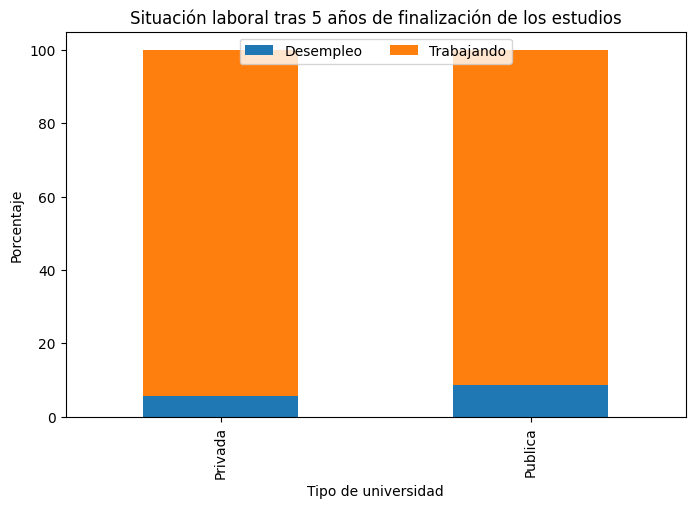

In [45]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(8, 5))
porcentaje_empleo['TRBPRN1'].unstack().plot(kind='bar', ax=ax, stacked=True)

ax.set_xlabel('Tipo de universidad')
ax.set_ylabel('Porcentaje')
ax.set_title('Situación laboral tras 5 años de finalización de los estudios')
ax.legend(loc='upper center', ncols=2)

plt.show()

Como se puede observar en el gráfico, el desempleo de las universidades públicas es mayor que en las universidades privadas. Estos resultados pueden apoyar la hipótesis de que el tipo de universidad influye a la hora de encontrar trabajo. Sin embargo, a los 5 años de haber obtenido el título no existe una diferencia tan significativa ya que con el transcurso del tiempo y gracias a la experiencia laboral, los estudiantes universitarios han ido encontrando en su mayoría trabajo.

Ahora obtendremos un gráfico con la misma información pero para poder ver más claramente la diferencia de empleo por tipo de universidad

In [46]:
# Calcular empleo por tipo de universidad 
# Igual que el anterior pero lo utilizamos para obtener una gráfica más clara

data_empleo_uni = students_grado.groupby('TRBPRN1')['T_UNIV'].value_counts()
empleo_uni = pd.DataFrame(data_empleo_uni)
empleo_uni['T_UNIV'] = (empleo_uni['T_UNIV'] / students_grado.value_counts('T_UNIV'))*100 # Normalizamos pero por la segunda variable ! Tipo_uni

empleo_uni

T_UNIV
TRBPRN1    T_UNIV            
Desempleo  Publica   8.645723
           Privada   5.742574
Trabajando Publica  91.354277
           Privada  94.257426

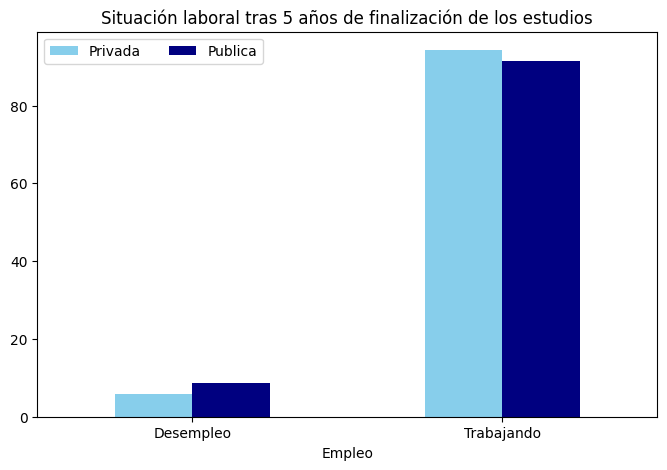

In [47]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(8, 5))
empleo_uni['T_UNIV'].unstack().plot(kind='bar', ax=ax,color=['skyblue', 'navy'])

# Títulos
ax.set_xlabel('Empleo')
ax.set_title('Situación laboral tras 5 años de finalización de los estudios')
ax.legend(loc='upper left', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal

plt.show()

Se observa muy bien el gráfico anterior como las situaciones de empleo/desempleo son totalmente inversas dependiendo el tipo de universidad

##### **Situación laboral nada más terminar los estudios por tipo de universidad**

Para conocer más en detalle cómo afecta el tipo de universidad a la hora de encontrar trabajo, obtendremos el primer trabajo tras la realización de los estudios en el curso 2013/2014 y compararemos los resultados con la tasa de empleo obtenida en 2019

La variable **HATR_E11** nos aporta información sobre el tiempo transcurrido desde que finalizó los estudios hasta que empezó a trabajar. La codificación de la variable es la siguiente:

- 0	Continuó al menos 6 meses más en el trabajo que tenía mientras estudiaba

- 1	Menos de tres meses

- 2	De 3 a 6 meses

- 3	De 6 meses a 1 año

- 4	De 1 año a  año y medio  

- 5	De 1 año y medio a  2 años 

- 6	2 ó más años

- 9	NS/NC

- NaN 	No aplicable


In [48]:
# Nos quedamos con aquellos campos no nulos y filtramos para excluir el grupo con el valor 9 (NS/NC)
students_primer_empleo = students.copy()
students_primer_empleo = students_primer_empleo[(students_primer_empleo['HATR_E11'].notnull()) & (students_primer_empleo['HATR_E11']!=9)] 

In [49]:
# Diccionario con la nueva codificación para la columna. 
tiempo_primer_empleo = {0: "Menos de 3 meses", 1: "Menos de 3 meses", 2: "3 meses - 6 meses", 3: "6 meses - 1 año", 4:"Más de 1 año", 5:"Más de 1 año", 6:"Más de 1 año"}

# Reemplaza los valores en la columna 'HATR_E11'
students_primer_empleo['HATR_E11'] = students_primer_empleo['HATR_E11'].replace(tiempo_primer_empleo)

In [50]:
# Calcular los porcentajes de tiempo transcurrido hasta el primer empleo por tipo de universidad
data_porcentaje_empleo = students_primer_empleo.groupby('T_UNIV')['HATR_E11'].value_counts(normalize=True) * 100

porcentaje__primer_empleo = pd.DataFrame(data_porcentaje_empleo) # Creamos un DataFrame para almacenar la información
porcentaje__primer_empleo



HATR_E11
T_UNIV  HATR_E11                    
Privada Menos de 3 meses   62.895431
        Más de 1 año       18.189807
        3 meses - 6 meses   9.600176
        6 meses - 1 año     9.314587
Publica Menos de 3 meses   46.832156
        Más de 1 año       29.157915
        6 meses - 1 año    12.648463
        3 meses - 6 meses  11.361466

In [51]:
# Para ordenar las columnas en orden cronológico y no por valores

orden_tiempo = ['Menos de 3 meses', '3 meses - 6 meses', '6 meses - 1 año', 'Más de 1 año']

# Reordenar el DataFrame según el nuevo orden
porcentaje__primer_empleo = porcentaje__primer_empleo.reindex(orden_tiempo, level='HATR_E11')
porcentaje__primer_empleo

HATR_E11
T_UNIV  HATR_E11                    
Privada Menos de 3 meses   62.895431
        3 meses - 6 meses   9.600176
        6 meses - 1 año     9.314587
        Más de 1 año       18.189807
Publica Menos de 3 meses   46.832156
        3 meses - 6 meses  11.361466
        6 meses - 1 año    12.648463
        Más de 1 año       29.157915

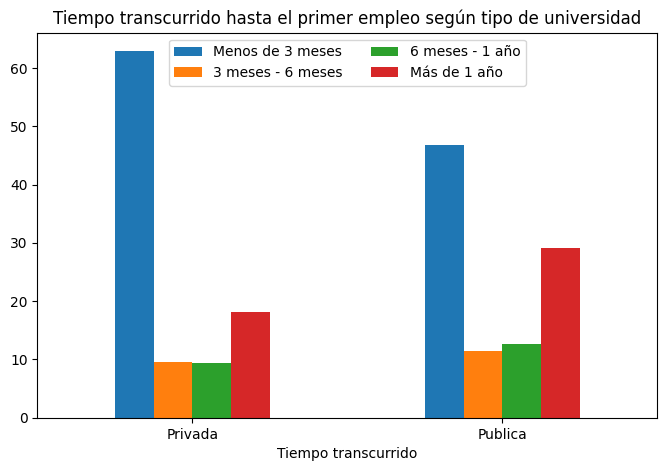

In [52]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(8, 5))
porcentaje__primer_empleo['HATR_E11'].unstack().plot(kind='bar', ax=ax, )

ax.set_xlabel('Tiempo transcurrido')
ax.set_title('Tiempo transcurrido hasta el primer empleo según tipo de universidad')
ax.legend(loc='upper center', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal
#plt.legend([ 'Menos de 3 meses','3 meses - 6 meses', '6 meses - 1 año', 'Más de 1 año'])

plt.show()

Mayor porcentaje de los estudiantes de las universidades privadas, al terminar sus estudios universitarios, encontraron trabajo antes que aquellos que cursaron su grado en una universidad pública

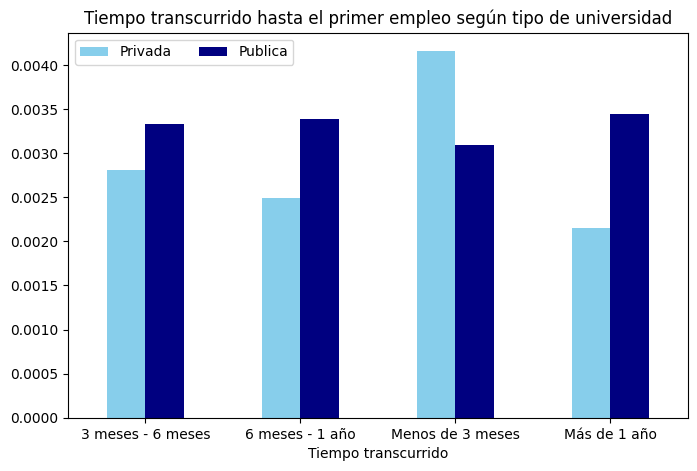

In [53]:
# tiempo transcurrido hasta el primer empleo por tipo de universidad

data_primer_empleo = students_primer_empleo.groupby('HATR_E11')['T_UNIV'].value_counts(normalize=True)
primer_empleo = pd.DataFrame(data_primer_empleo)
primer_empleo['T_UNIV'] = (primer_empleo['T_UNIV'] / students_primer_empleo.value_counts('T_UNIV'))*100 # Normalizamos pero por la segunda variable ! Tipo_uni


fig, ax = plt.subplots(figsize=(8, 5))
primer_empleo['T_UNIV'].unstack().plot(kind='bar', ax=ax,color=['skyblue', 'navy'])

# Títulos
ax.set_xlabel('Tiempo transcurrido')
ax.set_title('Tiempo transcurrido hasta el primer empleo según tipo de universidad')
ax.legend(loc='upper left', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal
plt.show()


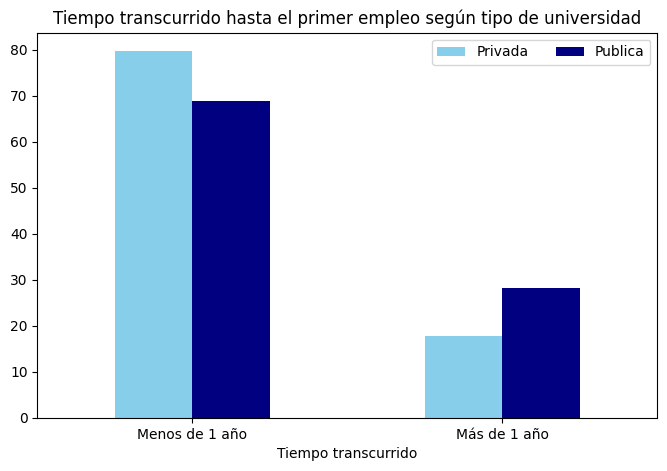

In [54]:
# REPETIMOS EL PROCESO ANTERIOR PERO CON VARIABLES CATEGÓRICAS MÚLTIPLES REDUCIDAS A BINARIAS PARA UNA VISIÓN GENERAL

# Nos quedamos con aquellos campos no nulos y filtramos para excluir el grupo con el valor 9 (NS/NC)
students_primer_empleo_binario = students.copy()
students_primer_empleo_binario = students_primer_empleo_binario[(students_primer_empleo_binario['HATR_E11'].notnull()) & (students_primer_empleo_binario['HATR_E11']!=9)] 

# Diccionario con la nueva codificación BINARIA para la columna.
tiempo_primer_empleo_binario = {0: "Menos de 1 año", 1: "Menos de 1 año", 2: "Menos de 1 año", 3: "Menos de 1 año", 4:"Más de 1 año", 5:"Más de 1 año", 6:"Más de 1 año"}

# Reemplaza los valores en la columna 'HATR_E11'
students_primer_empleo_binario['HATR_E11'] = students_primer_empleo_binario['HATR_E11'].replace(tiempo_primer_empleo_binario)

# Calcular tiempo hasta el primer empleo por tipo de universidad 
data_porcentaje_empleo_binario = students_primer_empleo_binario.groupby('HATR_E11')['T_UNIV'].value_counts() # Realizamos la agrupación al revés que la anterior
primer_empleo_b = pd.DataFrame(data_porcentaje_empleo_binario) # Creamos un data frame con los datos para trabajar facilmente
primer_empleo_b['T_UNIV'] = (primer_empleo_b['T_UNIV'] / students.value_counts('T_UNIV'))*100 # Normalizamos pero por la segunda variable ! Tipo_uni
primer_empleo_b


# GRAFICAMOS LOS RESULTADOS

fig, ax = plt.subplots(figsize=(8, 5))
primer_empleo_b['T_UNIV'].unstack().plot(kind='bar', ax=ax,color=['skyblue', 'navy'])

# Títulos
ax.set_xlabel('Tiempo transcurrido')
ax.set_title('Tiempo transcurrido hasta el primer empleo según tipo de universidad')
ax.legend(loc='upper right', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal

plt.show()

In [55]:
primer_empleo_b

T_UNIV
HATR_E11       T_UNIV            
Menos de 1 año Publica  68.759730
               Privada  79.691847
Más de 1 año   Publica  28.300838
               Privada  17.718810

Podemos observar cómo el hecho de estudiar en una universidad privada puede influir a la hora de encontrar trabajo más rápidamente al finalizar los estudios universitarios. Encontrar trabajo en menos de un año tras la finalización de los estudios supone un **79,69% para las universidad privadas** y un **68,76% para las públicas**.

##### **Situación laboral en el primer empleo**

Para realizar un análisis sobre el tipo de primer empleo obtenido por graduados universitarios, analizamos el tipo de contrato conseguido. Además, tendremos en cuenta que dichos empleos se hayan obtenido gracias al título universitario.

Emplearemos la variable 'PR_SIT_PR' que nos indica la situación laboral del primer empleo:

**1** : Trabajador en prácticas, formación (incluido MIR, EIR, FIR,…) o becario

**2** :	Asalariado con trabajo permanente o contrato de trabajo de duración indefinida

**3** :	Asalariado con trabajo temporal o contrato de trabajo de duración determinada

**4** :	Empresario con asalariados

**5** :	Trabajador independiente o empresario sin asalariados

**6** :	Ayuda en la empresa o negocio familiar

**NaN**	: No aplicable


Excluiremos aquellos registros con valor nulo para obtener las estadísticas. Además, consideraremos otra variable, 'PR_CONOC', que nos indica si el estudio universitario cursado ha servido para obtener su primer empleo. De esta manera, excluiremos aquellos empleos obtenidos tras los estudios que no se hayan conseguido gracias al título universitario y que los estudiantes aceptan como "puente" o para obtener unos ingresos extra mientras buscan otro trabajo.

In [56]:
# Nos quedamos con aquellos campos no nulos y filtramos para excluir aquellos registros cuyo valor de la variable PR_CONOC sea diferente de SÍ
tipo_primer_empleo = students.copy()
tipo_primer_empleo  = tipo_primer_empleo[(tipo_primer_empleo['PR_SIT_PR'].notnull()) & (tipo_primer_empleo['PR_CONOC']==1)] 

tipo_primer_empleo

,IDENT,SEXO,EDAD,NACIO,TITU,RAMA,AMBITO,T_UNIV,DISCA,ESTUDIOS_PADRE,...,PR_JOR,PR_NIVEL,PR_AREA,PR_CONOC,PR_SUELDO,HATR_E27,NOTRAB_BUS,NOTRAB_BUSM,NOTRAB_BUST,EST_B8
0,1,Hombre,Menores de 30 años,Española,11101,Ciencias sociales,11,Publica,2,2,...,1.0,3.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN,1
1,2,Hombre,Menores de 30 años,Española,11101,Ciencias sociales,11,Publica,2,3,...,1.0,3.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN,1
4,5,Hombre,Menores de 30 años,Española,11101,Ciencias sociales,11,Publica,2,8,...,2.0,3.0,2.0,1.0,3.0,2.0,NaN,NaN,NaN,1
9,10,Mujer,Menores de 30 años,Española,11101,Ciencias sociales,11,Publica,2,8,...,2.0,3.0,2.0,1.0,4.0,1.0,NaN,NaN,NaN,1
10,11,Mujer,Menores de 30 años,Española,11101,Ciencias sociales,11,Publica,2,2,...,1.0,3.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,31645,Mujer,Menores de 30 años,Española,109999,Ciencias sociales,109,Publica,2,7,...,2.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,1
31645,31646,Hombre,30-34 años,Española,109999,Ingeniería/arquitectura,109,Publica,2,9,...,2.0,2.0,1.0,1.0,4.0,1.0,NaN,NaN,NaN,1
31646,31647,Mujer,30-34 años,Española,109999,Ciencias sociales,109,Publica,2,9,...,2.0,2.0,3.0,1.0,3.0,1.0,NaN,NaN,NaN,1
31648,31649,Hombre,Mayores de 35 años,Española,109999,Ciencias sociales,109,Publica,2,3,...,2.0,3.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1


In [57]:
# Diccionario con la nueva codificación para la columna. 
tiempo_empleo = {1: "Practicas", 2: "Indefinido", 3: "Contrato temporal", 4: "Empresario", 5:"Autonomo", 6:"Negocio familiar"}

# Reemplaza los valores en la columna 'PR_SIT_PR'
tipo_primer_empleo['PR_SIT_PR'] = tipo_primer_empleo['PR_SIT_PR'].replace(tiempo_empleo)

In [58]:
# Calcular los porcentajes de tipo de primer empleo obtenido
porcentaje_tipo_empleo = tipo_primer_empleo.groupby('T_UNIV')['PR_SIT_PR'].value_counts(normalize=True) * 100

tipo__primer_empleo = pd.DataFrame(porcentaje_tipo_empleo) # Creamos un DataFrame para almacenar la información
#porcentaje_empleo.rename_axis(['T_Univ','Tiempo hasta el primer empleo'])
tipo__primer_empleo

PR_SIT_PR
T_UNIV  PR_SIT_PR                   
Privada Indefinido         45.146334
        Contrato temporal  28.223703
        Practicas          15.763547
        Autonomo            7.070414
        Empresario          2.752825
        Negocio familiar    1.043176
Publica Contrato temporal  34.473528
        Indefinido         33.474123
        Practicas          24.610351
        Autonomo            5.764426
        Empresario          1.094587
        Negocio familiar    0.582986

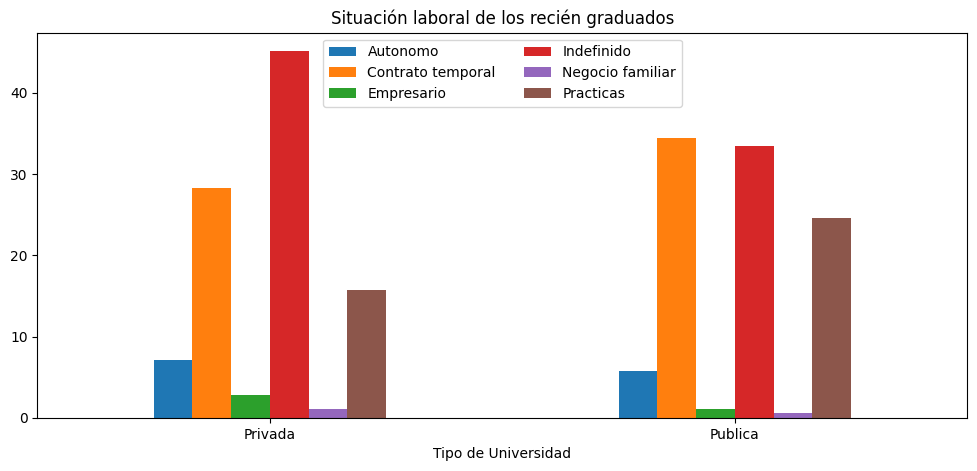

In [59]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(12, 5))
tipo__primer_empleo['PR_SIT_PR'].unstack().plot(kind='bar', ax=ax)

ax.set_xlabel('Tipo de Universidad')
ax.set_title('Situación laboral de los recién graduados')
ax.legend(loc='upper center', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal

plt.show()

Las situaciones anteriores mejor consideradas y que se relacionan con mayor éxito laboral son los contratos indefinidos, ya que aseguran cierta estabilidad; y el empresario, ya que se considera que al tener asalariados a su cargo tiene cierto nivel económico. Por el contrario, las prácticas para los estudiantes recién graduados no suelen estar bien pagadas y los estudiantes lo toman como un periodo para coger experiencia laboral. 

A la vista del gráfico, los estudiantes de universidades privada obtienen mayor número de contratos tanto indifenidos como en situación de empresarios. Por el contrato, aquellos que estudiaron en universidades públicas tienen un mayor número de contratos de prácticas y contratos temporales (se relacionan con una mayor inestabilidad laboral)

    2. Los estudiantes de ciertas ramas tiene más oportunidades de encontrar trabajo

Veamos como la variable del ámbito de estudio influye en la empleabilidad. ¿Existen sectores con mayor tasa de empleo y, por tanto, mejores oportunidades laborales?

##### **Empleo por rama de estudio**

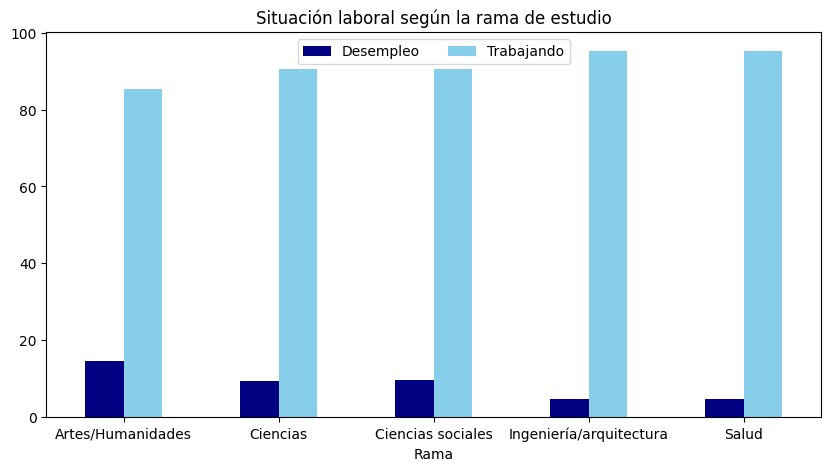

In [88]:
# Continuamos analizando con el mismo proceso, agrupando por variables.
empleo_rama = students_empleo.copy()

data_empleo_rama = empleo_rama.groupby('RAMA')['TRBPRN1'].value_counts(normalize=True, sort=True) *100
df_empleo_rama = pd.DataFrame(data_empleo_rama) 


fig, ax = plt.subplots(figsize=(10, 5))
df_empleo_rama['TRBPRN1'].unstack().plot(kind='bar', ax=ax,color=['navy', 'skyblue'])

# Títulos
ax.set_xlabel('Rama')
ax.set_title('Situación laboral según la rama de estudio')
ax.legend(loc='upper center', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal

plt.show()

In [61]:
empleo_rama.groupby('RAMA')['TRBPRN1'].value_counts( sort=True) 

RAMA                     TRBPRN1   
Artes/Humanidades        Trabajando     2385
                         Desempleo       406
Ciencias                 Trabajando     2341
                         Desempleo       244
Ciencias sociales        Trabajando    12134
                         Desempleo      1281
Ingeniería/arquitectura  Trabajando     6164
                         Desempleo       306
Salud                    Trabajando     4100
                         Desempleo       201
Name: TRBPRN1, dtype: int64

A pesar de ser una de las ramas menos demandadas, Artes/Humanidades posee la mayor tasa de desempleo de todas las ramas.

**BORRAR SIGUIENTE GRÁFICO**

<Axes: xlabel='RAMA', ylabel='Porcentaje'>

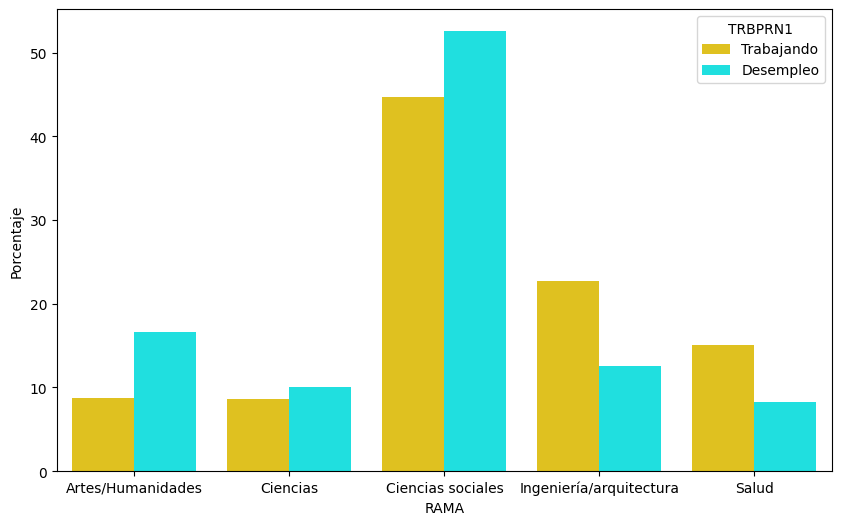

In [62]:
# Plot percentage of occupation per income class
gr_empleo_rama = students_empleo.groupby(['TRBPRN1'], sort=False)
data_empleo_rama_n = gr_empleo_rama['RAMA'].value_counts(normalize=True, sort=False)

data_empleo_rama = [
    {'RAMA': rama, 'TRBPRN1': empleo, 'Porcentaje': porcentaje*100} for 
    (empleo, rama), porcentaje in dict(data_empleo_rama_n).items()]

df_empleo_rama = pd.DataFrame(data_empleo_rama)

# Gráfico de resultados
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="RAMA", y="Porcentaje", hue="TRBPRN1", data=df_empleo_rama, palette=["gold", "cyan"])
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

##### **Empleo por ámbito de estudio**

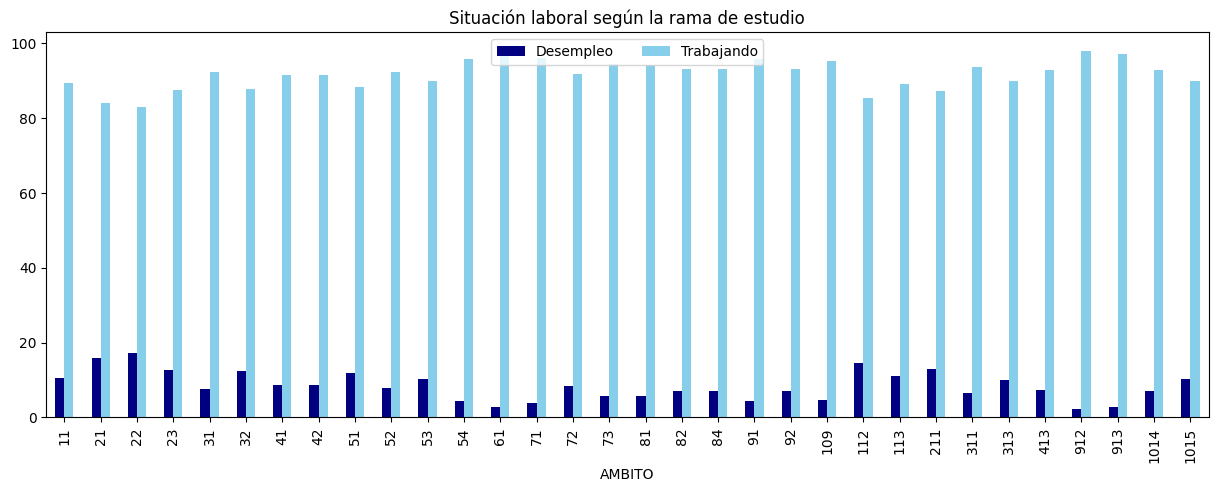

In [63]:
# Continuamos analizando con el mismo proceso, agrupando por variables.
empleo_rama = students_empleo.copy()
empleo_rama  = empleo_rama[(empleo_rama['AMBITO'].notnull()) & (empleo_rama['AMBITO']!=9999)] 

data_empleo_rama = empleo_rama.groupby('AMBITO')['TRBPRN1'].value_counts(normalize=True, sort=True) *100
df_empleo_rama = pd.DataFrame(data_empleo_rama) 


fig, ax = plt.subplots(figsize=(15, 5))
df_empleo_rama['TRBPRN1'].unstack().plot(kind='bar', ax=ax,color=['navy', 'skyblue'])

# Títulos
ax.set_xlabel('AMBITO')
ax.set_title('Situación laboral según la rama de estudio')
ax.legend(loc='upper center', ncols=2)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=1) # Para poner las etiquetas del eje X en vertical

plt.show()

    3. La edad de obtención del título universitario influye en la empleabilidad.

##### **Empleo según la edad**

Veamos como la variable de la edad de obtención del título universitario influye en la empleabilidad.

Primero analizaremmos el empleo tras 5 años de la obtención del titulo universitario.

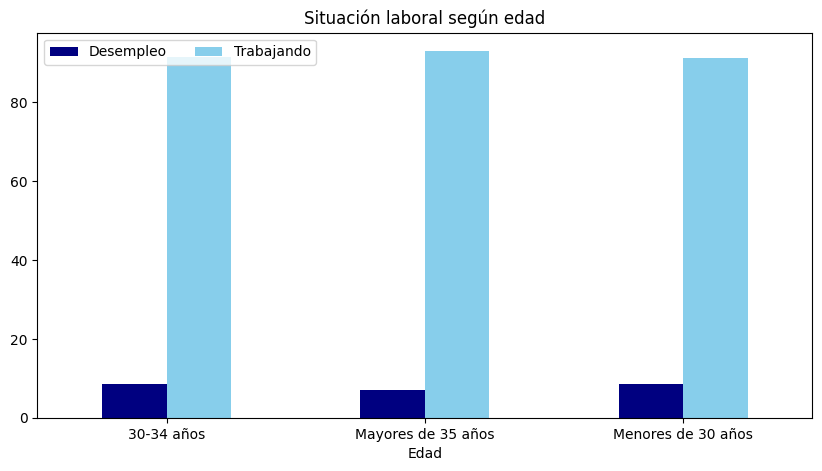

In [64]:
# Continuamos analizando con el mismo proceso, agrupando por variables.
empleo_edad = students_empleo.copy()

data_empleo_edad = empleo_edad.groupby('EDAD')['TRBPRN1'].value_counts(normalize=True, sort=True) *100
df_empleo_edad = pd.DataFrame(data_empleo_edad) 


fig, ax = plt.subplots(figsize=(10, 5))
df_empleo_edad['TRBPRN1'].unstack().plot(kind='bar', ax=ax,color=['navy', 'skyblue'])

# Títulos
ax.set_xlabel('Edad')
ax.set_title('Situación laboral según edad')
ax.legend(loc='upper left', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # Para poner las etiquetas del eje X en horizontal

plt.show()

Se observa una ligera disminución de la tasa de empleo y, por consiguiente, un aumento de la tasa de desempleo entre los estudiantes mayores de 35 años. Sin embargo, no consideramos que estas cifras sean valores significativos. Por esta razón descartamos la hipótesis de que la edad de las personas que estudian una carrera no influye significativamente a la hora de encontrar trabajo.

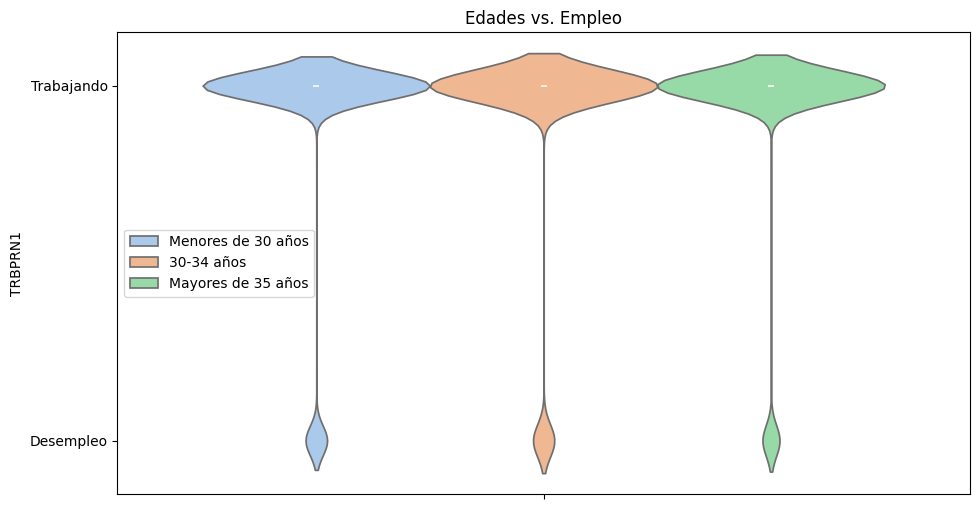

In [65]:
plt.figure(figsize=(11, 6))
sns.violinplot(hue='EDAD', y='TRBPRN1', data=empleo_edad, palette='pastel')
plt.title('Edades vs. Empleo')
plt.legend(loc='center left')
plt.show()

##### **Análisis bivariante de EDAD**

In [66]:
# Seleccionamos aquellas columnas que podrían estar relacionadas con la edad de los estudiantes como por ejemplo:
#   Situación laboral
#   Rama de estudio
#   Tipo de universidad
#   Uso de las tecnologías
#   Situación laboral de su primer empleo tras la titulación


students_heatmap = df_students.copy()
students_heatmap = students_heatmap[['EDAD','TRBPRN1','RAMA','T_UNIV','TIC','HATR_E11']] 


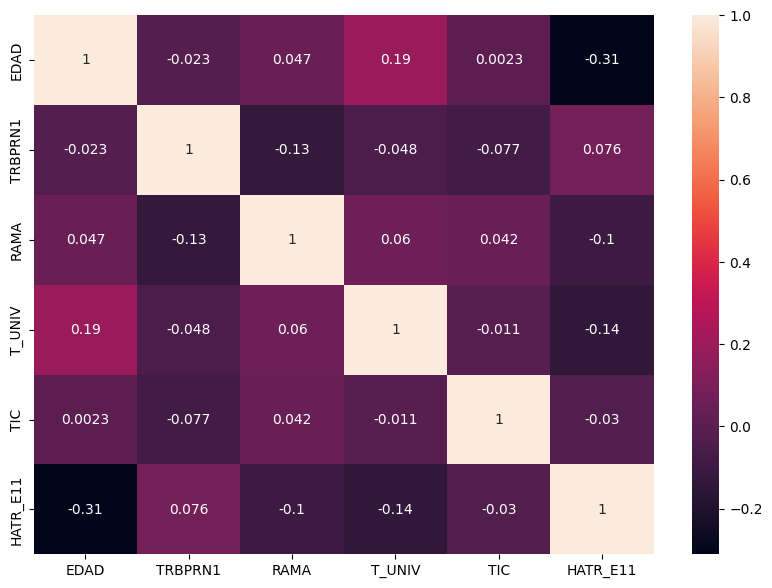

In [92]:
plt.figure(figsize=(10,7))

sns.heatmap(students_heatmap.corr(),annot=True); # Realizamos un mapa de calor con la correlación de 'EDAD' y varias variables seleccionadas

Sin embargo, aunque el empleo no está relacionado directamente con la edad, otras variables como el primer empleo obtenido o el tipo de universidad si tienen cierta correlación.

Analizaremos la variable del primer empleo obtenido

In [68]:
primer_empleo_edad = students_primer_empleo.copy()

data_primer_empleo_edad = primer_empleo_edad.groupby('EDAD')['HATR_E11'].value_counts(normalize=True, sort=True) *100
df_primer_empleo_edad = pd.DataFrame(data_primer_empleo_edad) 
df_primer_empleo_edad


HATR_E11
EDAD               HATR_E11                    
30-34 años         Menos de 3 meses   49.727978
                   Más de 1 año       24.076861
                   3 meses - 6 meses  13.288575
                   6 meses - 1 año    12.906586
Mayores de 35 años Menos de 3 meses   77.462093
                   Más de 1 año       11.806271
                   6 meses - 1 año     5.387899
                   3 meses - 6 meses   5.343736
Menores de 30 años Más de 1 año       36.465207
                   Menos de 3 meses   36.380268
                   6 meses - 1 año    14.733747
                   3 meses - 6 meses  12.420778

In [93]:
primer_empleo_edad_bin = students_grado.copy()

# Reducimos los grupos de edades a binario para realizar un análisis más sencillo y visual
edad_binario = {'30-34 años': "Mayor de 30 años", 'Mayores de 35 años': "Mayor de 30 años", 'Menores de 30 años': "Menores de 30 años"}

primer_empleo_edad_bin['EDAD'] = primer_empleo_edad_bin['EDAD'].replace(edad_binario)

# Reducimos el tiempo de encontrar trabajo para realizar un análisis más sencillo y visual
tiempo_primer_empleo_binario = {0: "Menos de 1 año", 1:"Menos de 1 año", 2: "Menos de 1 año",3:"Menos de 1 año",4:"Más de 1 año", 5:"Más de 1 año", 6:"Más de 1 año"}

primer_empleo_edad_bin['HATR_E11'] = primer_empleo_edad_bin['HATR_E11'].replace(tiempo_primer_empleo_binario)
primer_empleo_edad_bin= primer_empleo_edad_bin[primer_empleo_edad_bin['HATR_E11'] !=9]


data_tiempo_empleo_binario = primer_empleo_edad_bin.groupby('EDAD')['HATR_E11'].value_counts(normalize=True)*100
primer_empleo_b = pd.DataFrame(data_tiempo_empleo_binario) 

primer_empleo_b


HATR_E11
EDAD               HATR_E11                 
Mayor de 30 años   Menos de 1 año  81.831325
                   Más de 1 año    18.168675
Menores de 30 años Menos de 1 año  75.874855
                   Más de 1 año    24.125145

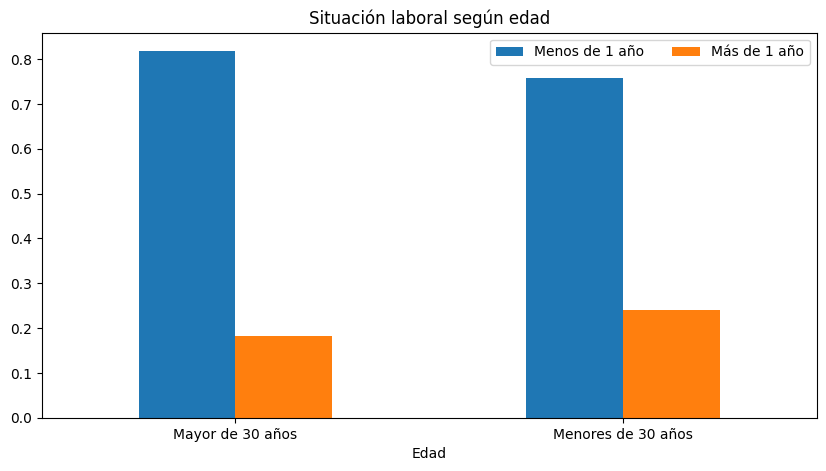

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
primer_empleo_b['HATR_E11'].unstack().plot(kind='bar', ax=ax)

# Títulos
ax.set_xlabel('Edad')
ax.set_title('Situación laboral según edad')
ax.legend(loc='upper right', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 

plt.show()

Vemos como en el grupo de más edad, encuentra trabajo en menos tiempo más estudiantes que en el grupo de menor edad.

    La vocación hacia los estudios afecta la empleabilidad de los estudiantes.

In [ ]:
# Para ordenar las columnas en orden cronológico y no por valores

orden_tiempo = ['Menos de 3 meses', '3 meses - 6 meses', '6 meses - 1 año', 'Más de 1 año']

# Reordenar el DataFrame según el nuevo orden
porcentaje__primer_empleo = porcentaje__primer_empleo.reindex(orden_tiempo, level='HATR_E11')
df_mot_estudios = porcentaje__primer_empleo

In [76]:
df_mot_estudios = students_grado.copy() # tenemos en cuenta aquellos universitarios con un solo grado

# Diccionario con la nueva codificación para la columna
mot_estudio_dict = {1: "Trabajo", 2: "Vocación", 3: "Otros", 9:9}

df_mot_estudios['EST_B8'] = df_mot_estudios['EST_B8'].replace(mot_estudio_dict)
df_mot_estudios= df_mot_estudios[df_mot_estudios['EST_B8'] !=9]

In [78]:
data_mot_estudios = df_mot_estudios.groupby('EST_B8')['TRBPRN1'].value_counts(normalize=True) 
mot_estudios = pd.DataFrame(data_mot_estudios) 

mot_estudios

TRBPRN1
EST_B8   TRBPRN1             
Otros    Trabajando  0.921671
         Desempleo   0.078329
Trabajo  Trabajando  0.916840
         Desempleo   0.083160
Vocación Trabajando  0.913246
         Desempleo   0.086754

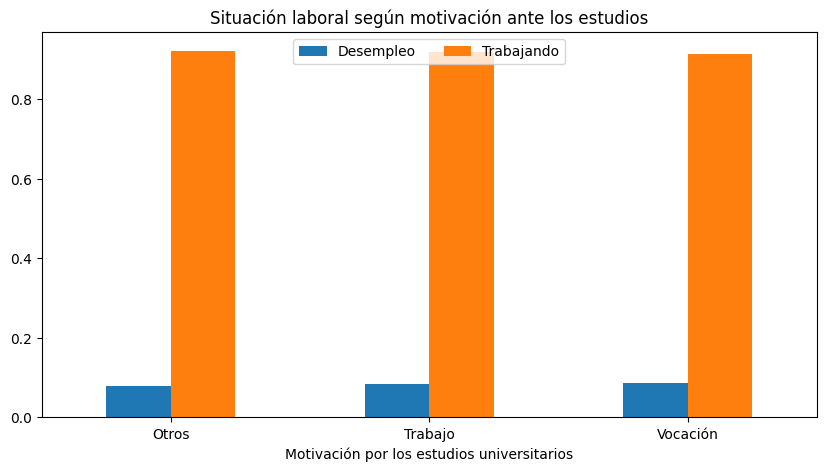

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
mot_estudios['TRBPRN1'].unstack().plot(kind='bar', ax=ax)

# Títulos
ax.set_xlabel('Motivación por los estudios universitarios')
ax.set_title('Situación laboral según motivación ante los estudios')
ax.legend(loc='upper center', ncols=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 

plt.show()

In [83]:
data_mot_estudios_b = df_mot_estudios.groupby('TRBPRN1')['EST_B8'].value_counts(normalize=True) 
mot_estudios_b = pd.DataFrame(data_mot_estudios_b) 

mot_estudios_b

EST_B8
TRBPRN1    EST_B8            
Desempleo  Trabajo   0.785414
           Vocación  0.130435
           Otros     0.084151
Trabajando Trabajo   0.785596
           Vocación  0.124571
           Otros     0.089833

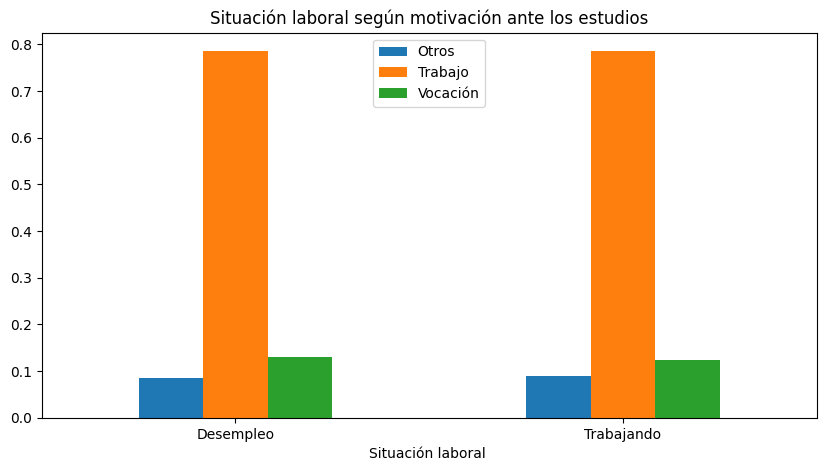

In [87]:
fig, ax = plt.subplots(figsize=(10, 5))
mot_estudios_b['EST_B8'].unstack().plot(kind='bar', ax=ax)

# Títulos
ax.set_xlabel('Situación laboral ')
ax.set_title('Situación laboral según motivación ante los estudios')
ax.legend(loc='upper center', ncols=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 

plt.show()

Podemos observar cómo la motivación NO influye en el éxito laboral en general

#### **7.3 HIPÓTESIS ADICIONALES**

    La educación familiar influye en la empleabilidad del estudiante

##### **Estudios del padre**

Para comprobar la relación entre el nivel de formación de uno de los progenitores y la obtención del primer empleo

In [ ]:
estudios_padre = students_empleo.copy()

In [ ]:
# Diccionario con la nueva codificación para la columna. 
tipo_estudios_prog = {1: "Analfabeto", 2: "Hasta primaria", 3: "Hasta primaria", 4: "Secundaria", 5:"Bachillerato", 6:"Grado medio", 
                      7:"Grado superior", 8:"Universidad", 9: pd.NA}

# Reemplaza los valores en la columna 'PR_SIT_PR'
estudios_padre['ESTUDIOS_PADRE'] = estudios_padre['ESTUDIOS_PADRE'].replace(tipo_estudios_prog)

In [ ]:
# Filtramos solo aquellos valores no nulos
estudios_padre = estudios_padre[estudios_padre['ESTUDIOS_PADRE'].notnull()]

In [ ]:
estudios_padre

,IDENT,SEXO,EDAD,NACIO,TITU,RAMA,AMBITO,T_UNIV,DISCA,ESTUDIOS_PADRE,...,PR_JOR,PR_NIVEL,PR_AREA,PR_CONOC,PR_SUELDO,HATR_E27,NOTRAB_BUS,NOTRAB_BUSM,NOTRAB_BUST,EST_B8
0,1,1,1,1,11101,3,11,Publica,2,Hasta primaria,...,1.0,3.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN,1
1,2,1,1,1,11101,3,11,Publica,2,Hasta primaria,...,1.0,3.0,2.0,1.0,3.0,1.0,NaN,NaN,NaN,1
2,3,1,1,1,11101,3,11,Publica,2,Hasta primaria,...,2.0,4.0,3.0,2.0,3.0,1.0,NaN,NaN,NaN,1
3,4,1,1,1,11101,3,11,Publica,2,Grado superior,...,2.0,4.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,1
5,6,1,1,1,11101,3,11,Publica,2,Hasta primaria,...,2.0,3.0,2.0,2.0,3.0,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,31645,2,1,1,109999,3,109,Publica,2,Grado superior,...,2.0,3.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,1
31647,31648,2,2,1,109999,3,109,Publica,2,Grado medio,...,2.0,3.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,1
31648,31649,1,3,1,109999,3,109,Publica,2,Hasta primaria,...,2.0,3.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1
31649,31650,1,1,1,109999,3,109,Publica,2,Universidad,...,1.0,3.0,1.0,9.0,9.0,1.0,NaN,NaN,NaN,1


In [ ]:
gr_estudios_padre = estudios_padre.groupby(['ESTUDIOS_PADRE'])['TRBPRN1'].value_counts(normalize=True) * 100
gr_estudios_padre

ESTUDIOS_PADRE  TRBPRN1   
Analfabeto      Trabajando    93.396226
                Desempleo      6.603774
Bachillerato    Trabajando    91.976401
                Desempleo      8.023599
Grado medio     Trabajando    91.275465
                Desempleo      8.724535
Grado superior  Trabajando    91.465677
                Desempleo      8.534323
Hasta primaria  Trabajando    91.733374
                Desempleo      8.266626
Secundaria      Trabajando    91.088479
                Desempleo      8.911521
Universidad     Trabajando    92.347847
                Desempleo      7.652153
Name: TRBPRN1, dtype: float64

In [ ]:
gr_estudios_padre = pd.DataFrame(gr_estudios_padre)

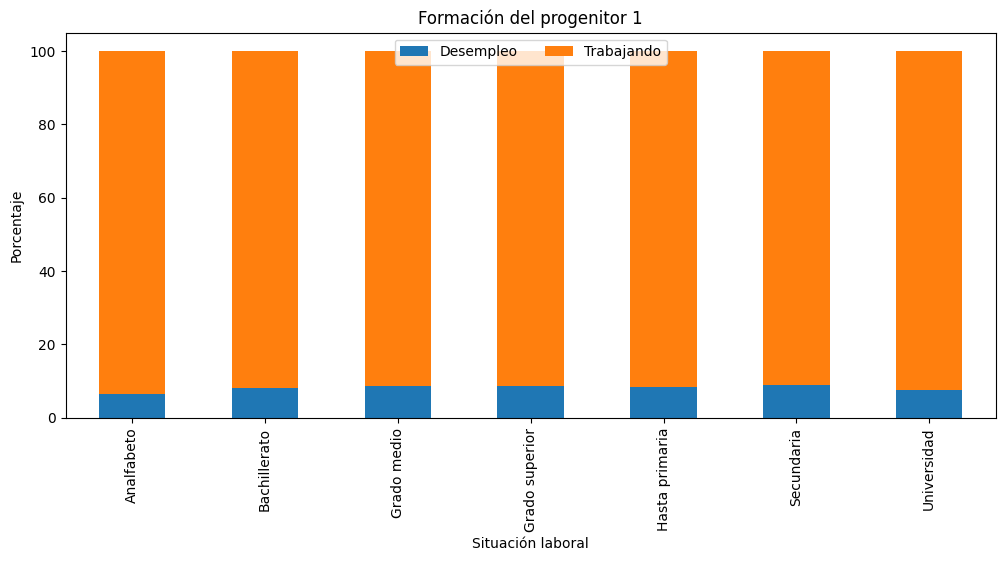

In [ ]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(12, 5))
gr_estudios_padre['TRBPRN1'].unstack().plot(kind='bar', ax=ax,stacked=True)

ax.set_xlabel('Situación laboral')
ax.set_ylabel('Porcentaje')
ax.set_title('Formación del progenitor 1')
ax.legend(loc='upper center', ncols=2)


plt.show()

Veamos que sucede teniendo en cuenta tambián el tipo de universidad donse se cursaron los estudios en 2013/2014

In [ ]:
estudios_padre_univ = estudios_padre.groupby(['ESTUDIOS_PADRE','T_UNIV'])['TRBPRN1'].value_counts(normalize=True) * 100
estudios_padre_univ

ESTUDIOS_PADRE  T_UNIV   TRBPRN1   
Analfabeto      Privada  Trabajando    100.000000
                Publica  Trabajando     91.764706
                         Desempleo       8.235294
Bachillerato    Privada  Trabajando     94.285714
                         Desempleo       5.714286
                Publica  Trabajando     91.618399
                         Desempleo       8.381601
Grado medio     Privada  Trabajando     91.304348
                         Desempleo       8.695652
                Publica  Trabajando     91.271443
                         Desempleo       8.728557
Grado superior  Privada  Trabajando     96.153846
                         Desempleo       3.846154
                Publica  Trabajando     90.672451
                         Desempleo       9.327549
Hasta primaria  Privada  Trabajando     95.940959
                         Desempleo       4.059041
                Publica  Trabajando     91.131445
                         Desempleo       8.868555
Secundaria    

##### **Estudios de la madre por tipo de universidad**

Para comprobar la relación entre el nivel de formación del segundo progenitor y la obtención del primer empleo

In [ ]:
estudios_madre = students_empleo.copy()

In [ ]:
# Diccionario con la nueva codificación para la columna. 
tipo_estudios_prog = {1: "Analfabeto", 2: "Hasta primaria", 3: "Hasta primaria", 4: "Secundaria", 5:"Bachillerato", 6:"Grado medio", 
                      7:"Grado superior", 8:"Universidad", 9: pd.NA}

# Reemplaza los valores en la columna 'PR_SIT_PR'
estudios_madre['ESTUDIOS_MADRE'] = estudios_madre['ESTUDIOS_MADRE'].replace(tipo_estudios_prog)

In [ ]:
# Filtramos solo aquellos valores no nulos
estudios_madre = estudios_madre[estudios_madre['ESTUDIOS_MADRE'].notnull()]

In [ ]:
gr_estudios_madre = estudios_madre.groupby(['ESTUDIOS_MADRE'])['TRBPRN1'].value_counts(normalize=True) * 100
gr_estudios_madre

ESTUDIOS_MADRE  TRBPRN1   
Analfabeto      Trabajando    93.333333
                Desempleo      6.666667
Bachillerato    Trabajando    92.328767
                Desempleo      7.671233
Grado medio     Trabajando    91.608133
                Desempleo      8.391867
Grado superior  Trabajando    91.761364
                Desempleo      8.238636
Hasta primaria  Trabajando    91.294986
                Desempleo      8.705014
Secundaria      Trabajando    91.380261
                Desempleo      8.619739
Universidad     Trabajando    92.133995
                Desempleo      7.866005
Name: TRBPRN1, dtype: float64

In [ ]:
gr_estudios_madre = pd.DataFrame(gr_estudios_madre)

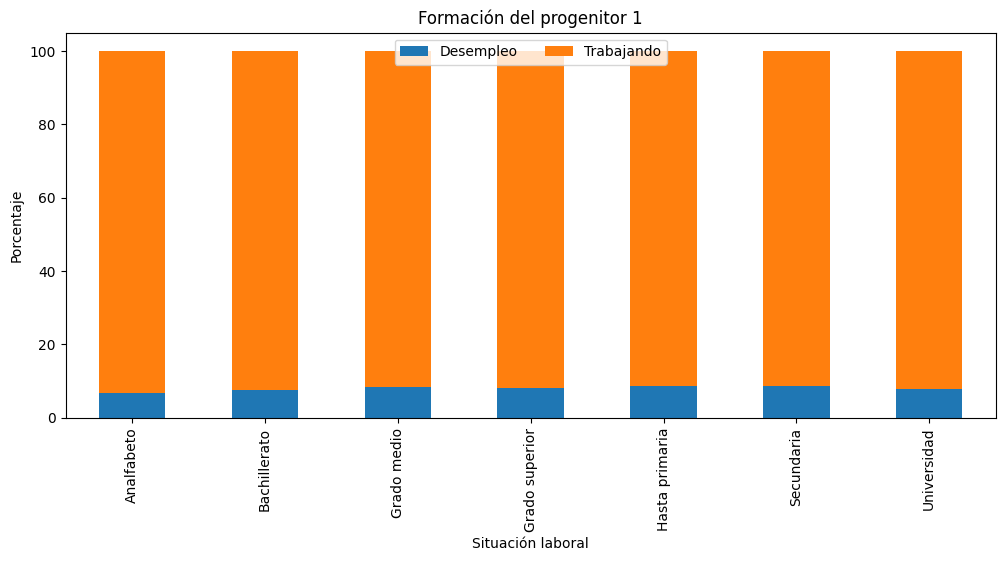

In [ ]:
# Gráfico porcentajes
fig, ax = plt.subplots(figsize=(12, 5))
gr_estudios_madre['TRBPRN1'].unstack().plot(kind='bar', ax=ax,stacked=True)

ax.set_xlabel('Situación laboral')
ax.set_ylabel('Porcentaje')
ax.set_title('Formación del progenitor 1')
ax.legend(loc='upper center', ncols=2)


plt.show()

Veamos que sucede teniendo en cuenta tambián el tipo de universidad donse se cursaron los estudios en 2013/2014

In [ ]:
estudios_madre_univ = estudios_madre.groupby(['ESTUDIOS_MADRE','T_UNIV'])['TRBPRN1'].value_counts(normalize=True) * 100
estudios_madre_univ

ESTUDIOS_MADRE  T_UNIV   TRBPRN1   
Analfabeto      Privada  Trabajando    100.000000
                Publica  Trabajando     91.860465
                         Desempleo       8.139535
Bachillerato    Privada  Trabajando     94.813278
                         Desempleo       5.186722
                Publica  Trabajando     91.950758
                         Desempleo       8.049242
Grado medio     Privada  Trabajando     96.285714
                         Desempleo       3.714286
                Publica  Trabajando     90.912951
                         Desempleo       9.087049
Grado superior  Privada  Trabajando     95.769231
                         Desempleo       4.230769
                Publica  Trabajando     91.066667
                         Desempleo       8.933333
Hasta primaria  Privada  Trabajando     96.017699
                         Desempleo       3.982301
                Publica  Trabajando     90.532333
                         Desempleo       9.467667
Secundaria    